# Projeto Prático 03 - MLPClassifier

A aplicação de IA utiliza o MLPClassifier (Multi-Layer Perceptron Classifier), uma ferramenta pronta da biblioteca Sklearn. Nele, irá ser realizado a simulação do Perceptron a partir da base de dados Wine e Iris.

In [ ]:
import time
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

In [44]:
def treinar_avaliar_mlp(dataset, nome_dataset):
    print(f"\n===== CLASSIFICAÇÃO USANDO MLP - {nome_dataset} =====")

    # Carregar dados
    X = dataset.data
    y = dataset.target

    # Separar em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42
    )

    # Padronização (importante para MLP)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Criar e treinar o MLPClassifier
    mlp = MLPClassifier(
        hidden_layer_sizes=(10, 10),
        max_iter=1000,
        activation='relu',
        solver='adam',
        random_state=42
    )

    # Treinamento e tempo
    start_train = time.perf_counter()
    mlp.fit(X_train, y_train)
    end_train = time.perf_counter()
    tempo_treino = end_train - start_train

    # Predição e tempo
    start_pred = time.perf_counter()
    y_pred = mlp.predict(X_test)
    end_pred = time.perf_counter()
    tempo_pred = end_pred - start_pred

    # Avaliação
    acc = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {acc:.4f}")
    print(f"Tempo de Treinamento: {tempo_treino:.4f} segundos")
    print(f"Tempo de Predição: {tempo_pred:.4f} segundos")
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred, digits=3))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dataset.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {nome_dataset}")
    plt.show()


===== CLASSIFICAÇÃO USANDO MLP - Iris =====
Acurácia: 1.0000
Tempo de Treinamento: 0.2075 segundos
Tempo de Predição: 0.0002 segundos

Relatório de Classificação:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



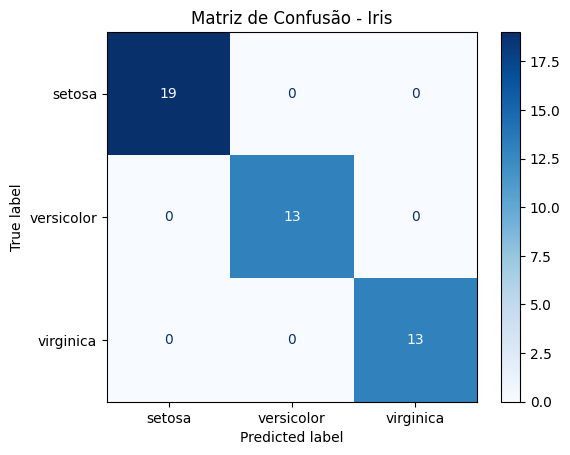

In [45]:
# ==========================================================
# EXPERIMENTO 1: IRIS
# ==========================================================
iris = load_iris()
treinar_avaliar_mlp(iris, "Iris")


===== CLASSIFICAÇÃO USANDO MLP - Wine =====
Acurácia: 0.9815
Tempo de Treinamento: 0.2030 segundos
Tempo de Predição: 0.0002 segundos

Relatório de Classificação:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     0.952     0.976        21
           2      0.933     1.000     0.966        14

    accuracy                          0.981        54
   macro avg      0.978     0.984     0.980        54
weighted avg      0.983     0.981     0.982        54



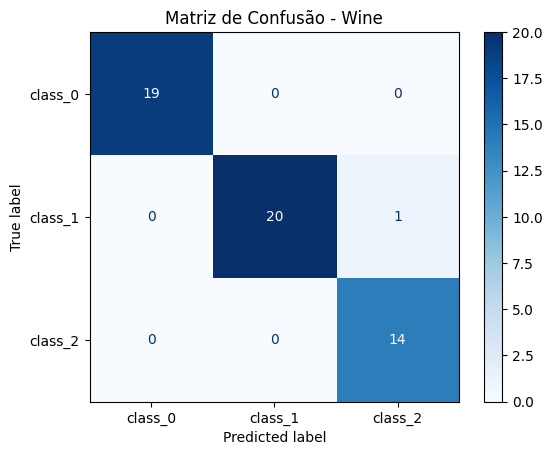

In [46]:
# ==========================================================
# EXPERIMENTO 2: WINE
# ==========================================================
wine = load_wine()
treinar_avaliar_mlp(wine, "Wine")